In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [29]:
df = pd.read_csv('cleaned_unique_years.csv', sep=',', quotechar='"')
df.columns = df.columns.str.strip()

# Clean columns with commas (like "2,100.75")
for col in ['Population', 'GDP per Capita', 'Hospital Beds', 'Doctors per 1000',
            'Smoking Rate', 'Mortality Rate', 'Life Expectancy']:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)


In [30]:
print(df.columns.tolist())


['Year', 'Population', 'Elderly (%)', 'GDP per Capita', 'Hospital Beds', 'Doctors per 1000', 'Smoking Rate', 'Mortality Rate', 'Life Expectancy']


In [31]:
features = ['Year', 'Population', 'Elderly (%)', 'GDP per Capita',
            'Hospital Beds', 'Doctors per 1000', 'Smoking Rate']

X = df[features]
y_mortality = df['Mortality Rate']
y_life_exp = df['Life Expectancy']

In [32]:
X_train, X_test, y_train_m, y_test_m, y_train_l, y_test_l = train_test_split(
    X, y_mortality, y_life_exp, test_size=0.2, random_state=42
)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
model_mortality = RandomForestRegressor(n_estimators=100, random_state=42)
model_life_exp = RandomForestRegressor(n_estimators=100, random_state=42)


In [35]:
model_mortality.fit(X_train_scaled, y_train_m)
model_life_exp.fit(X_train_scaled, y_train_l)

RandomForestRegressor(random_state=42)

In [36]:
# Use the correct scaled test input
y_mort_pred = model_mortality.predict(X_test_scaled)
y_life_pred = model_life_exp.predict(X_test_scaled)

# Print performance metrics
print("Model Performance:")
print(f"Mortality Rate R² Score: {r2_score(y_test_m, y_mort_pred):.4f}")
print(f"Life Expectancy R² Score: {r2_score(y_test_l, y_life_pred):.4f}")


Model Performance:
Mortality Rate R² Score: -0.3958
Life Expectancy R² Score: -0.1570


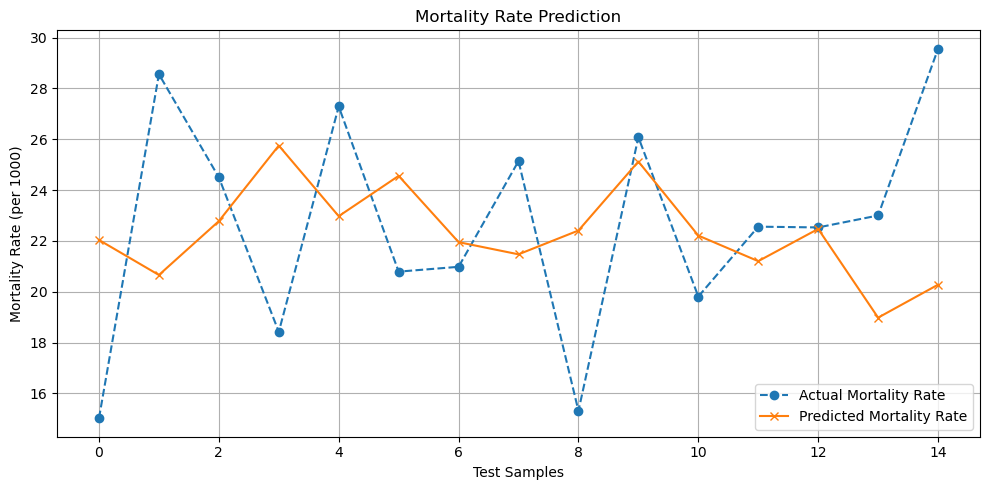

In [37]:
# Predict using the correct variable
y_mort_pred = model_mortality.predict(X_test_scaled)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(y_test_m.values, label='Actual Mortality Rate', marker='o', linestyle='--')
plt.plot(y_mort_pred, label='Predicted Mortality Rate', marker='x', linestyle='-')
plt.title("Mortality Rate Prediction")
plt.xlabel("Test Samples")
plt.ylabel("Mortality Rate (per 1000)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


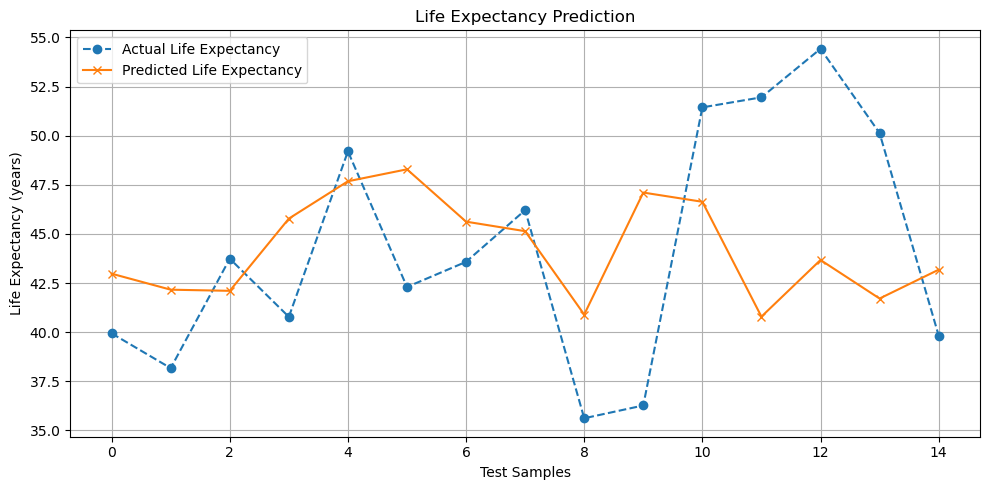

In [38]:
# Predict life expectancy if not already done
y_life_pred = model_life_exp.predict(X_test_scaled)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(y_test_l.values, label='Actual Life Expectancy', marker='o', linestyle='--')
plt.plot(y_life_pred, label='Predicted Life Expectancy', marker='x', linestyle='-')
plt.title("Life Expectancy Prediction")
plt.xlabel("Test Samples")
plt.ylabel("Life Expectancy (years)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
print("Enter values to predict Mortality Rate and Life Expectancy:")

custom_data = {
    "Year": float(input("Year (e.g., 2023): ")),
    "Population": float(input("Population (e.g., 125000000): ")),
    "Elderly (%)": float(input("Elderly Population % (e.g., 30.0): ")),
    "GDP per Capita": float(input("GDP per Capita (e.g., 50000): ")),
    "Hospital Beds": float(input("Hospital Beds per 1000 (e.g., 13.0): ")),
    "Doctors per 1000": float(input("Doctors per 1000 (e.g., 2.5): ")),
    "Smoking Rate": float(input("Smoking Rate % (e.g., 18.0): "))
}

# Convert to DataFrame
custom_df = pd.DataFrame([custom_data])

# Ensure correct column order (must match training)
feature_columns = ['Year','Population', 'Elderly (%)', 'GDP per Capita', 
                   'Hospital Beds', 'Doctors per 1000', 'Smoking Rate']
custom_df = custom_df[feature_columns]

# Scale using trained scaler
custom_scaled = scaler.transform(custom_df)

# Predict
mortality_prediction = model_mortality.predict(custom_scaled)[0]
life_expectancy_prediction = model_life_exp.predict(custom_scaled)[0]

# Categorize life expectancy
if life_expectancy_prediction < 55:
    life_exp_category = "Low"
elif 55 <= life_expectancy_prediction <= 75:
    life_exp_category = "Average"
else:
    life_exp_category = "High"

# Output
print(f"\nYear Selected: {int(custom_data['Year'])}")
print(f"Predicted Mortality Rate: {mortality_prediction:.2f} deaths per 1,000")
print(f"Predicted Life Expectancy: {life_expectancy_prediction:.2f} years")
print(f"Life Expectancy is: {life_exp_category}")


Enter values to predict Mortality Rate and Life Expectancy:

Year Selected: 2005
Predicted Mortality Rate: 23.20 deaths per 1,000
Predicted Life Expectancy: 46.59 years
Life Expectancy is: Low


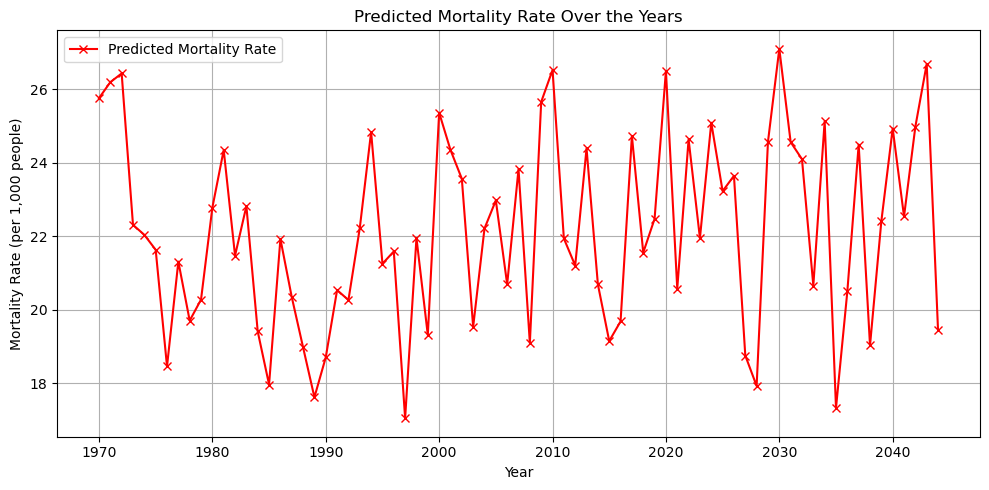

In [42]:
# Mortality Rate Plot
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Predicted Mortality Rate'], label='Predicted Mortality Rate', marker='x', color='red')
plt.title('Predicted Mortality Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 1,000 people)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


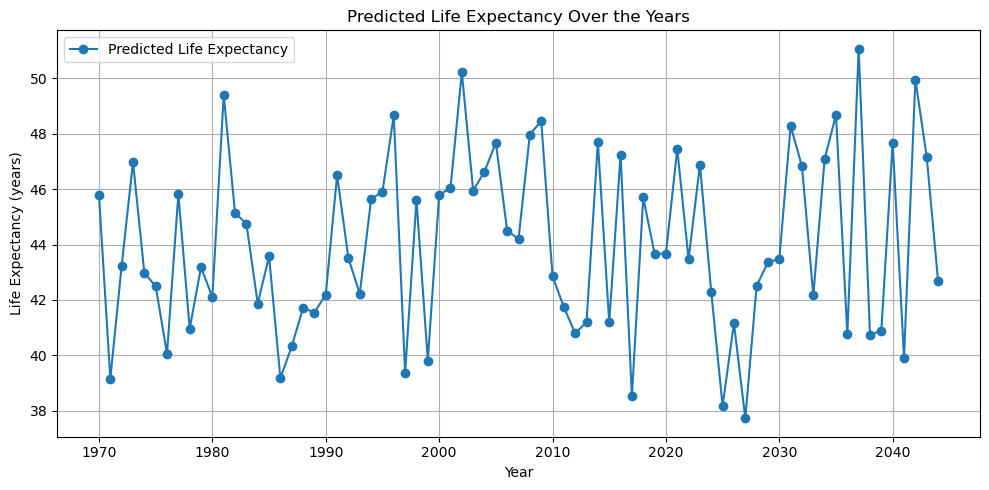

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Predicted Life Expectancy'], label='Predicted Life Expectancy', marker='o')
plt.title('Predicted Life Expectancy Over the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
